# 13. IFAR-10 이미지 생성하기

### 목표
- 1. 프로젝트 개요 
- 2. 작업 환경 구성하기
- 3. 데이터셋 구성하기
- 4. 생성자 모델 구현하기
- 5. 판별자 모델 구현하기
- 6. 손실함수와 최적화 함수 구현하기
- 7. 훈련과정 상세 기능 구현하기
- 8. 학습 과정 진행하기
- 9. (Optional) GAN 훈련 과정 개선하기

### 목표
- 1. 프로젝트 개요 
- 2. 작업 환경 구성하기
- 3. 데이터셋 구성하기
- 4. 생성자 모델 구현하기
- 5. 판별자 모델 구현하기
- 6. 손실함수와 최적화 함수 구현하기
- 7. 훈련과정 상세 기능 구현하기
- 8. 학습 과정 진행하기
- 9. (Optional) GAN 훈련 과정 개선하기

## 1. 프로젝트 개요

### (1) 생성 모델링
- **생성 모델링**은 지금까지 접해 보았던 기본적인 딥러닝 모델들과는 사뭇 다름
- 이전에 '인공지능과 가위바위보 하기'프로젝트에서 직접 가위, 바위, 보에 해당하는 사진을 찍어 데이터셋 만들고, 각 이미지를 알맞은 카테고리로 **분류**할 수 있도록 학습시킴. 이런 모델을 **판별 모델링(Discriminative Modeling)'**이라고 부름. 말 그대로 입력받은 데이터를 어떤 기준에 대해 판별하는 것이 목표인 모델
- 반면, **생성 모델링**은 말 그대로 없던 데이터를 **생성**해내는 것이 목표
- 가위바위보 프로젝트로 대입해 본다면 다양한 가위, 바위, 보가 담긴 데이터셋에서 각 이미지의 특징을 학습해 그와 비슷한 새로운 사진을 만들어내야 하는 것
- 물론 실제 사진과 거의 구별이 어려울 정도로 좋은 품질의 이미지를 만들어내는 것이 최종 목표
- 즉, 판별 모델과 생성 모델을 한 마디로 설명해 보자면
    - **판별 모델**: 입력된 데이터셋을 특정 기준에 따라 분류하거나, 특정 값을 맞추는 모델
    - **생성 모델**: 학습한 데이터셋과 비슷하면서도 기존에는 없던 새로운 데이터셋을 생성하는 모델로 정리할 수 있음

- 새로운 무언가를 만들어 내는 생성 모델링의 아이디어는 꽤나 매력적
- 하지만 그만큼 어려운 분야이기도 함
- 생성 모델의 개념은 꽤 오래전부터 있었지만 그 성능을 높여 유의미한 결과를 만들어 내는 것은 오랫동안 도전 과제로 남아있었음
- 최근 여러 분야에서 높은 성능을 보이는 딥러닝 기술과 만나면서 여러 가지 놀라운 결과들을 만들어내고 있음
- 본격적으로 생성 모델링에 대해 배우기 전에, 실제로 최근의 생성 모델은 어떤 것을 만들어낼 수 있는지 AWS의 DeepComposer 시연 영상 확인
- [Announcing AWS DeepCompower with Dr.Matt Wood](https://www.youtube.com/watch?v=XH2EbK9dQlg&t=8s)

### (2) GAN(Generative Adversarial Network)이란
- 데이터가 준비되었으니 모델을 만들어 볼차례
- 위에서 많은 생성 모델들이 무엇을 할 수 있는지 살펴보았음
- 하지만 그것들은 모두 꽤나 발전된 형태의 생성 모델링 기법들
- 가장 간단한 형태의 생성 모델 중 하나는 바로 GAN(Generative Adversarial Network)
- GAN은 2014년 lan Goodfelow라는 연구자에 의해 처음 나온 네트워크
- 발표된 후 독특하면서도 직관적인 아이디어로 많은 인기를 얻었고 지금까지도 굉장히 많은 연구가 이루어지고 있는 모델
> GAN은 생성모델 중 하나
- 맨 처음 DeepComposer 영상에서도 설명했듯, GAN에는 2가지 네트워크가 있음
    - **생성자(Generator)**: 아무 의미 없는 랜덤 노이즈로부터 신경망에서의 연산을 통해 이미지 형상의 벡터 생성. 즉, 무에서 유를 창조하는 것과 같은 역할
    - **판별자(Disdriminator)**: 기존에 있던 진짜 이미지와 생성자가 만들어잰 이미지를 입력받아 각 이미지가 Real인지, Fake인지에 대한 판단 정도를 실숫값으로 출력
    - Ian Goodfellow가 GAN을 처음 발표했던 2014년의 논문에서는 이 두 네트워크를 다음과 같이 비유했음
- [논문](https://arvix.org/pdf/1406.2661.pdf)
>"In the proposed adversarial nets framework, the generative model is pitted against an adversary: a discriminative model that learns to determine whether a sample is from the model distribution or the data distribution. The generative model can be thought of as analogous to a team of counterfeiters, trying to produce fake currency and use it without detection, while the discriminative model is analogous to the police, trying to detect the counterfeit currency. Competition in this game drives both teams to improve their methods until the counterfeits are indistiguishable from the genuine articles."

- 이렇게 서로 경쟁하듯 이루어진 모델의 구조 덕분에 이름에 "Adversarial(적대적인)"이 들어가게 된 것
![adversarial.png](./images/adversarial.png)

### (3) GAN을 학습하는 과정
- GAN을 학습하는 과정은 보기보다 까다로움
- 모델 구조, learning_rate, 파라미터 초기화, 생성자와 판별자의 경쟁 관계, 데이터의 특성 등 고려해야 할 것이 참 많음
- 앞에서 배운 FASHION-MNIST 데이터 생성용 DCGAN 모델구조를 이용해서 CIFAR-10 데이터를 생성하는 모델을 직접 만들어 보기
- 모델 구현 및 학습의 전과정의 흐름은 거의 비슷하겠지만, 아래와 같이 몇 가지 달라지는 점이 있음
    - 이미지 데이터의 shape가 (28. 28, 1)에서 (32, 32, 3)으로 변경됨. 생성자, 판별자 모델의 입출력 shape 및 모델 구조에 영향이 있음
    - 이미지가 단색의 grayscale에서 RGB 3채널의 컬러이미지로 변경됨. 시각화 과정에서 고려할 점이 있음
    - 입력데이터 전체 차원이 3~4배 증가하면서, 학습이 진행되는 양상이 다소 달라짐

## 2. 작업 환경 구성하기

- 다음과 같이 작업환경 구성하기
![cmd.png](./images/cmd.png)

## 3. 데이터셋 구성하기

- CIFAR-10 데이터셋도 'tf.keras' 안에 있는 'datasets'에 포함되어 있어서, 아래와 같이 손쉽게 데이터셋을 구성할 수 있음

In [1]:
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

print("tensorflow", tf.__version__)

tensorflow 2.4.1


In [2]:
cifar10 = tf.keras.datasets.cifar10

(train_x, _), (test_x, _) = cifar10.load_data()

train_x.shape

(50000, 32, 32, 3)

In [3]:
print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 255
min pixel: 0


### 학습에 사용할 'train_x'의 이미지를 **-1, 1**로 정규화

- 이번 프로젝트에서는 각 픽셀을 -1, 1로 정규화시켜서 사용할 예정
- 중간값을 0으로 맞춰주기 위해 127.5를 뺀 후 127.5로 나눠주기

In [4]:
train_x = (train_x - 127.5) / 127.5

print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 1.0
min pixel: -1.0


In [5]:
train_x.shape

(50000, 32, 32, 3)

- train 데이터셋에는 5만 장의 이미지가 들어 있음
- 이미지의 사이즈는 32x32임을 확인할 수 있음

### 로드한 학습 데이터를 시각화를 통해 확인해보기

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


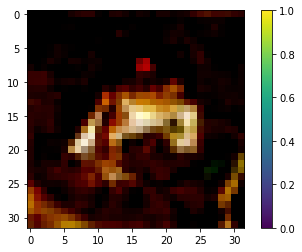

In [6]:
plt.imshow(train_x[0].reshape(32,32,3))
plt.colorbar()
plt.show()

- plt.colorbar()를 이용해 오르쪽에 각 픽셀의 값과 그에 따른 색도 확인해 보았음
- 이번에는 10개 정도를 띄워보기
- for문을 활용하면 간단하게 볼수 있음

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

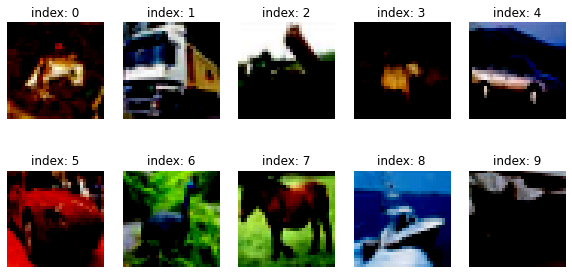

In [7]:
# 이미지의 전체 프레임의 크기 결정
plt.figure(figsize = (10, 5))

for i in range(10):
    # 여러 개의 이미지를 한 번에 띄우고 싶을 때 - plt.subplot(row, col, index)
    # 10개의 이미지를 2x5의 배열 형태로 보고 싶은 경우, plt.subplot(2, 5, index)로 작성하면 됨
    # index는 1부터 10까지 순서대로 바꾸어야 하니 for문에서 사용하는 i에 i+1 넣어주면 됨
    plt.subplot(2, 5, i+1)
    plt.imshow(train_x[i].reshape(32, 32, 3))
    # 이미지에 제목으로 라벨값을 넣어줬음
    plt.title(f'index: {i}')
    # 불필요한 축을 지워서 깔끔하게 나타내기
    plt.axis('off')
plt.show()

- for문을 활용해서 이미지 25개를 5 x 5 배열로 띄워보기
- 단, 모든 이미지는 train_images에서 랜덤으로 추출(힌트: numpy에서 랜덤으로 정수를 추출해주는 함수 찾아보기)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

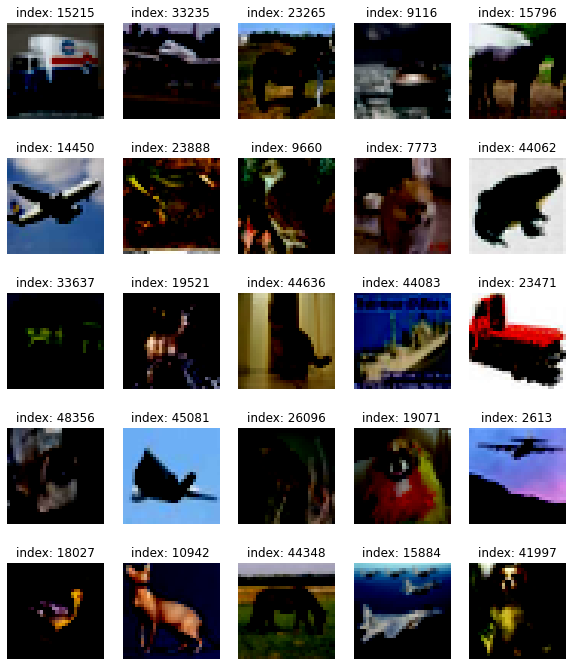

In [8]:
plt.figure(figsize = (10, 12))

for i in range(25):
    plt.subplot(5, 5, i+1)
    random_index = np.random.randint(1, 50000)
    plt.imshow(train_x[random_index].reshape(32, 32, 3))
    plt.title(f'index: {random_index}')
    plt.axis('off')
plt.show()

- 데이터에 대한 전처리는 모두 마쳤음
- 정리된 데이터를 곧 모델에 넣어서 학습시켜야 하니, 편하게 사용할 수 있도록 텐서플로우의 'Dataset'을 이용해 준비
- 이를 이용하면 매번 모델에게 직접 섞어서 넣어주지 않아도 됨

### tf.data.Dataset 모듈의 from_tensor_slices() 함수를 사용하여 미니배치 데이터셋 구성해보기

In [ ]:
BUFFER_SIZE = 50000
BATCH_SIZE = 256

- BUFFER_SIZE는 전체 데이터를 섞기 위해 50,000으로 설정
- shuffle() 함수가 데이터셋을 잘 섞어서 모델에 넣어줄 것
- [텐서플로우 공식 문서: tf.data.Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle)
- BATCH_SIZE는 모델이 1번에 학습할 데이터의 양
    - 너무 많은 양을 1번에 학습시키면 메모리 활용 면에서도 비효율적이고, 1번 학습을 하는 데에도 오래 걸리므로 적절한 사이즈로 잘라서 학습을 진행
- 이러한 방식을 **미니배치 학습**이라고 함

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

- tf.data.Dataset 모듈의 'from_tensor_slices()'함수 사용하면 리스트, 넘파이, 또는 텐서플로우의 텐서 자료형에서 데이터셋 만들 수 있음
- 위 코드는 'train_x'라는 넘파이 배열(numpy ndarray)형 자료를 섞고, 이를 배치 사이즈에 따라 나누도록 함
- 데이터가 잘 섞이기 하기 위해서는 버퍼 사이즈를 총 데이터 사이즈와 같거나 크게 설정하는 것이 좋음

## 4. 생성자 모델 구현하기

### (1) GAN과 생성 모델 다시 정리하기
- 추가로 GAN에 대한 여러 가지 설명이 잘 나와 있는 2016년의 OpenAI 글 읽어보기
- [Generative Models - openai](https://openai.com/blog/generative-models/)

- GAN의 모델 구조를 알아보았으니, 바로 코드로 모델을 어떻게 구현할 수 있는지 확인해 보기
> GAN에는 생성자, 판별자 모델 2개가 있음
- 이번 프로젝트에서 구현해 볼 모델은 이전 스텝에서 언급했던 'DCGAN(Deep Convolutional GAN)'
- DCGAN은 GAN의 개념이 처음 소개된 1년 반 이후 발표된 논문으로서, 이전의 GAN을 더욱 발전시켜서 훨씬 그럴듯한 고화질 이미지 생성을 이루어낸 첫 번째 논문으로 평가받고 있음
- 이후 발표된 수많은 GAN 기반 이미지 생성모델들은 대부분 DCGAN 모델을 발전시킨 형태라고 할 수 있으므로, 그 구조를 상세히 살펴보고 구현 연습을 해보는 것은 의미 있음
- 모델의 구현은 Keras 'Sequential' API를 활용
- 이후 소개하는 코드는 [Tensorflow 2.0 Tutorial의 DCGAN 구현](https://www.tensorflow.org/tutorials/generative/dcgan?hl=ko)을 기반으로 상세한 설명 추가한 것
    - [러닝 텐서플로 - Chap07.3 - 텐서플로 추상화와 간소화, Keras](https://excelsior-cjh.tistory.com/159)

### (2) CIFAR-10 생성자 모델 구현하기
- (32, 32, 3)의 shape를 가진 이미지를 생성하는 생성자 모델 구현 함수 작성해보기
- 'noise = tf.random.normal([1, 100])'로 생성된 랜덤 노이즈를 입력으로 하여 방금 구현한 생성자로 랜덤 이미지 생성해 보기
- 생성된 랜덤 이미지가 생성자 출력 규격에 잘 맞는지 확인해보기

In [11]:
# make_generator_model이라는 함수 만들어서 언제든 생성자 생성할 수 있도록 함
def make_generator_model():
    
    # Start
    # tf.keras.Sequential()로 모델 시작한 후 레이어 쌓아주기
    model = tf.keras.Sequential()
    
    # First: Dense Layer
    model.add(layers.Dense(4*4*256, use_bias = False, input_shape = (100, )))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    # Second: Reshape layer
    model.add(layers.Reshape((4, 4, 256)))
    
    # Third: Conv2DTranspose lyaer
    # 가장 중요한 레이어. 일반적인 Conv2D와 반대로 이미지 사이즈를 넓혀주는 층
    # 이 모델에서는 3번의 Conv2DTranspose 층을 이용해 (4, 4, 256) -> (8, 8, 128) -> (16 , 16, 64) -> (32, 32, 3) 순으로 이미지 키워나감
    model.add(layers.Conv2DTranspose(128, kernel_size = (4, 4), strides = (2, 2), padding = 'same', use_bias = False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha = 0.2))
    
    # Fourth: Conv2DTranspose lyaer
    model.add(layers.Conv2DTranspose(64, kernel_size = (4, 4), strides = (2, 2), padding = 'same', use_bias = False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha = 0.2))
    
    # Fifth: Conv2DTranspose layer
    # 최종 사이즈인 (28, 28, 1)은 우리가 준비했던 데이터셋과 형상이 동일
    model.add(layers.Conv2DTranspose(3, kernel_size = (4, 4), strides = (2, 2), padding = 'same', use_bias = False, activation = 'tanh'))
    
    return model

- [What is Transposed Convolutional Layer?](https://towardsdatascience.com/what-is-transposed-convolutional-layer-40e5e6e31c11)
- 레이어의 사이사이에 특정 층들이 반복되는 것을 확인할 수 있는데, 'BatchNormalization' 레이어는 신경망의 가중치가 폭발하지 않도록 가중치 값을 정규화시켜줌
- 또한, 중간층들의 활성화 함수는 모두 'LeakyReLU'를 사용하였음
- 다만 마지막 층에는 활성화 함수로 'tanh'를 사용하는데, 이는 -1 ~ 1 이내의 값으로 픽셀값을 정규화시켰던 데이터와 동일하게 하기 위함
    - [라온피플-Batch Normalization](https://m.blog.naver.com/laonple/220808903260)
    - [활성화 함수(activation function](https://newly0513.tistory.com/20)

- Q. 생성자의 입력 벡터는 어떤 형태인가?
- 모델은 입력값으로 (batch_size, 100) 형상의 노이즈 벡터 받음
- Q. 처음 입력된 벡터는 어떤 레이어를 지나며, 첫 레이어를 지난 후의 shape는 어떤 형태인가?
- 입력된 (batch_size, 100) 벡터는 4 x 4 x 256 = 4,096개의 노드를 가진 첫 번째 Dense 레이어를 거치며 (batch_size, 4,096) 형상의 벡터가 됨
- Q. 첫 번째 레이어를 지난 후, 벡터는 어떤 층을 지나게 되며, 이 레이어는 왜 필요한가?
- 첫 번째 레이어를 지난 후 벡터는 Reshape 레이어를 지나게 됨
- 이는 이후의 Layer에서 Convolutional 연산을 할 수 있도록 1차원 벡터를 (4,4, 256) 형상의 3차원 벡터로 변환시키는 작업

- 생성 모델을 'generator'라는 변수로 생성하고, 모델 세부 내용인 summmary 출력

In [12]:
generator = make_generator_model()
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4096)              413696    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 4096)              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 128)         524416    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 16, 16, 128)       262272    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 128)       0

- 모델이 만들어졌으니, 'shape = (1, 100)'의 형상을 가지는 랜덤 노이즈 벡터를 생성해서 결과물을 만들어보기
- 아직 모델이 학습되지 않았으니, 아마 결과물도 큰 의미가 있지는 않을 것
- 'tf.random.nromal'을 이용하면 가우시안 분포에서 뽑아낸 랜덤 벡터로 이루어진 노이즈 벡터 만들 수 있음

In [13]:
noise = tf.random.normal([1, 100])

- 텐서플로우 2.0 이후 버전에서는 레이어와 모델에 call 메소드를 구현해 놓기 때문에, 방긍 만들어진 생성자 모델에 입력값으로 노이즈를 넣고 바로 모델을 호출하면 간단히 결과 이미지가 생성됨(내부적으로는 생성자의 **call** 함수가 호출됨)
- 단, 지금은 학습하는 중이 아니니 'training = False'를 설정해 주어야 함
- Batch Normalization 레이어는 훈련 시기와 추론(inference) 시기의 행동이 다르기 때문에 'training = False'을 주어야 올바른 결과 얻을 수 있음

In [14]:
generated_image = generator(noise, training = False)
generated_image.shape

TensorShape([1, 32, 32, 3])

- '[1, 32, 32, 1]' 사이즈의 이미지가 잘 생성되었음
- 첫 번째 1은 1개(batch_size = 1)라는 뜻을, 그 뒤로는 (32, 32, 3) 사이즈 이미지가 생성되었다는 뜻을 가짐
- 그러면 이 이미지를 또 시각화해서 확인해보기
- matplotlib 라이브러리는 2차원 이미지만 보여줄 수 있으므로 0번째와 3번째 축의 인덱스를 0으로 설정해서 (32, 32) shape의 이미지를 꺼낼 수 있도록 해야 함

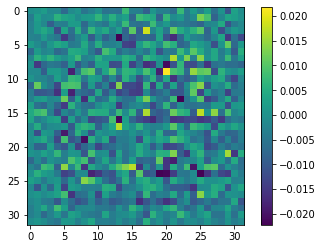

In [15]:
plt.imshow(generated_image[0, :, :, 0])
plt.colorbar()
plt.show()

- -1과 1사이의 값에서 적당히 잘 생성된 것 확인할 수 있음
- 아직은 모델이 전혀 학습하지 않은 상태이기 때문에 아무런 의미가 없는 노이즈 같은 이미지가 생성되었음
- 모델이 점차 학습해 나가며 제대로 된 이미지 생성할 수 있을 것

## 5. 판별자 모델 구현하기

- (32, 32, 3)의 이미지를 입력으로 받아 1dim 판별결과를 출력하는 판별자 모델 구현 함수 작성해보기
- 4번에서 생성한 랜덤 이미지를 판별자 모델이 판별한 결과값 확인해 보기

In [16]:
def make_discriminator_model():
    
    # Start
    model = tf.keras.Sequential()
    
    # First: Conv2D Layer
    model.add(layers.Conv2D(64, (3, 3), strides = (2, 2), padding = 'same', input_shape = [32, 32, 3]))
    model.add(layers.LeakyReLU(alpha = 0.2))
#     model.add(layers.Dropout(0.3))
    
    # Second: Conv2D Layer
    model.add(layers.Conv2D(128, (3, 3), strides = (2, 2), padding = 'same'))
    model.add(layers.LeakyReLU(alpha = 0.2))
#     model.add(layers.Dropout(0.3))
    
    # Third: Conv2D Layer
    model.add(layers.Conv2D(128, (3, 3), strides = (2, 2), padding = 'same'))
    model.add(layers.LeakyReLU(alpha = 0.2))
#     model.add(layers.Dropout(0.3))
    
    # Fourth: Conv2D Layer
    model.add(layers.Conv2D(256, (3, 3), strides = (2, 2), padding = 'same'))
    model.add(layers.LeakyReLU(alpha = 0.2))
    model.add(layers.Dropout(0.3))
    
    # Fifth: Flatten Layer
    model.add(layers.Flatten())
    
    # Sixth: Dense Layer
    model.add(layers.Dense(1))
    
    return model

- 판별자 또한 'make_discriminator_model' 함수로 구현하였음
- 'Conv2DTranspose' 층을 사용해서 이미지를 키워나갔던 생성자와 반대로, 판별자는 'Conv2D' 층으로 이미지의 크기를 점점 줄여나감
- 첫 번째 Conv2D 층에서 입력된 '[32, 32, 3]' 사이즈의 이미지는 다음 층을 거치며 '(32, 32, 3) -> (16, 16, 64) -> (8, 8, 128) -> (4, 4, 128) -> (2, 2, 256)'까지 줄어들게 됨
- 마지막에는 'Flatten' 층을 사용해 3차원 이미지를 1차원으로 쭉 펴서 2x2x256 = 1024, 즉 (1, 1024) 형상의 벡터로 변환함
- 이는 생성자의 'Reshape' 층에서 1차원 벡터를 3차원으로 변환했던 것과 정확히 반대 역할을 함
- 1차원 벡터로 변환한 후에는 마지막 'Dense' Layer를 거쳐 단 하나의 값을 출력하게 됨
- 그럼 판별 모델을 'discriminator'라는 변수 이름으로 생성하고, 모델 세부 내용인 summary를 출력해보기

In [17]:
discriminator = make_discriminator_model()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)        

- 이전에 생성했던 가짜 이미지를판별자에 입력시키면 어떤 결과가 나올까? 바로 확인해 보기

In [18]:
decision = discriminator(generated_image, training=False)
decision

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00062655]], dtype=float32)>

- 텐서플로우의 텐서 형태로 출력이 되었음
- 이 값 또한 아직은 아무런 의미가 없는 값일 것

## 6. 손실함수와 최적화 함수 구현하기

- 생성자와 판별자의 손실함수(loss) 구현해 보기
- 판별자의 출력값을 가지고 실제/생성(real/fake) 이미지 판별 정확도(accuracy)를 계산하는 함수 구현해 보기
- 생성자와 판별자를 최적화하는 optimizer 정의하기

### 손실함수(loss function)
- GAN은 손실함수로 교차 엔트로피(Cross Entropy) 사용
- 교차 엔트로피는 앞서 분류 모델을 설계할 때 많이 사용했던 손실함수
- 점점 가까워지기 원하는 두 값이 얼마나 큰 차이가 나는지를 정량적으로 계산할 때 많이 쓰임
- 특히 판별자는 1개의 이미지가 가짜인지 진짜인지 나타내는 2개 클래스 간 분류 문제를 풀어야 하므로, 이진 교차 엔트로피(binary crossentropy)를 사용할 것
- 생성자와 판별자의 목적이 무엇인지 한번 정리해보기
    - 생성자는 자기가 생성한 Fake Image를 판별자가 진짜라고 판단하도록 속이고 싶어함
    - 판별자는 생성자가 생성한 가짜 이미지를 가짜로, 진짜 이미지를 진짜로 잘 판별하는 것이 목표
- 그렇다면 Real Image에 대한 라벨을 '1', Fake Iimage에 대한 라벨을 '0'으로 두었을 때, 각각의 손실함수를 이용해 정량적으로 달성해야 하는 목표하는 결과는 다음과 같음
    - 생성자: 판별자가 Fake Image에 대해 판별한 값, 즉, 'D(fake_image)' 값이 '1'에 가까워지는 것
    - 판별자: Real Image 판별값, 즉 'D(real_image)'는 '1'에, Fake Image 판별값, 즉 'D(fake_image)'는 '0'에 가까워지는 것
- 결국 생성자든 구분자든, 결국 손실함수에 들어가는 값은 모두 판별자의 판별값이 되었음
- 이러한 기준을 가지고 생성자, 판별자 각각에 대한 손실함수 설계해보기
- 손실함수에 사용할 교차 엔트로피 함수는 'tf.keras.losses' 라이브러리 안에 있음
- 다만, 교차 엔트로피를 계산하기 위해 입력할 값은 판별자가 판별한 값인데, 판별자 모델의 맨 마지막 Layer에는 값을 정규화시키는 sigmoid나 tanh같은 활성화 함수가 없었음. 즉, 구분자가 출력하는 값은 범위가 정해지지 않아 모든 실숫값을 가질 수 있음
- 그런데 tf.keras.losses의 BinaryCrossEntropy 클래스는 기본적으로 본인에게 들어오는 인풋값이 0-1 사이에 분포하는 확률값이라고 가정([참고](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy#args_1)). 따라서 'from_logits'를 True로 설정해 주어야 'BinaryCrossEntropy'에 입력된 값을 함수 내부에서 sigmoid 함수를 사용해 0-1 사이의 값으로 정규화한 후 알맞게 계산할 수 있음

In [19]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

- 그럼, 이제 'cross_entropy'를 활용해 계산할 loss들은 'fake_output'와 'real_output', 2가지를 활용
    - fake_output: 생성자가 생성한 Fake Image를 구분자에 입력시켜서 판별된 값. 즉, 'D(fake_image)'
    - real_output: 기존에 있던 Real Image를 구분자에 입력시켜서 판별된 값, 즉 'D(real_image)'
- 그럼 이제, 'fake_output'과 'real_output'을 각각 1 또는 0에 비교를 해야 하는데, 어떻게 비교할 수 있을까?
- 바로 'tf.ones_like()'와 'tf.zeros_like()' 함수 활용하면 됨
- 이 함수들은 특정 벡터와 동일한 크기이면서 값은 1 또는 0으로 가득 채워진 벡터를 만들고 싶을 때 사용

### generator_loss
- 'generator_loss'는 다음과 같이 구현할 수 있음
- 'generator_loss'는 'fake_output'가 1에 가까워지기를 바라므로, 다음과 같이 'tf.ones_like'와의 교차 엔트로피값을 계산하면 됨
- 즉, 'cross_entropy(tf.ones_like(fake_output), fake_output) 값은 fake_output이 (Real Image를 의미하는) 1에 가까울수록 작은 값을 가짐

In [20]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

### discriminator_loss
- 반면, 'discriminator_loss'는 'real_output' 값은 1에 가까워지기를, 'fake_output' 값은 0에 가까워지기를 바라므로, 2가지 loss 값을 모두 계산
- 'real_output'은 1로 채워진 벡터와, 'fake_output'은 0으로 채워진 벡터와 비교하면 됨
- 최종 'discriminator_loss' 값은 이 둘을 더한 값

In [21]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

### discriminator_accuracy
- 판별자가 real output, fake output을 얼마나 정확히 판별하는지의 accuracy를 계산해 보는 것도 GAN의 학습에서 매우 중요
- 특히, 두 accuracy를 따로 계산해 비교해 보는 것이 매우 유용
- 만약, 판별자가 real output과 fake output을 accuracy가 1.0에 가까울 정도로 정확하게 판별해 낸다면 좋은 것일까?
- 그렇지 않음. 이 경우 생성자가 만들어내는 fake output이 real output과 차이가 많이 차이 나기 때문에 판별자가 매우 쉽게 판별해 내고 있다는 뜻
- 그래서, real accuracy와 fake accuracy는 초반에는 1.0에 가깝게 나오다가, 서서히 낮아져서 둘 다 0.5에 가까워지는 것이 이상적
- fake accuracy가 1.0에 더 가깝다면 아직은 생성자가 판별자를 충분히 잘 속이지 못하고 있다는 뜻

In [22]:
def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

- 위 함수 안에 사용된 tensorflow 함수들의 역할을 순차적으로 예를 들어 정리하면 다음과 같음
- ex) real_output = tf.Tensor(0.2, 0.4, 0.7, 0.9)라면,
    - (1) tf.math.greater_equal(real_output, tf.constant(0.5):real_output의 각 원소가 0.5 이상인지 True, False로 판별 - >> 'tf.Tensor([False, False, True, True])
    - (2) tf.cast((1), tf.float32: (1)의 결과가 True이면 1.0, Flase이면 0.0으로 변환 ->> tf.Tensor([0.0, 0.0, 1.0, 1.0])
    - (3) tf.reduce_mean((2)): (2)의 결과를 평균내어 이번 배치의 정확도(accuracy)를 계산 ->> 0.5

### 최적화 함수(optmizer)
- 손실함수는 모두 설계가 되었고, 최적화 함수를 설정할 차례
- 이번에는 **Adam 최적화 기법**을 활용해 볼 예정
- [문과생도 이해하는 딥러닝 (8) - 신경망 학습 최적화](https://sacko.tistory.com/42)
- Adam 함수 또한 'tf.keras.optimizers' 안에 있음
- 중요한 하이퍼 파라미터인 "learning rate"는 0.0001로 설정할 텐데, 학습 품질을 올려보고 싶다면 여러 가지로 값을 바꾸어 가며 학습을 진행해 보는 것을 추천
- 또한, 중요한 점 1가지는 생성자와 구분자는 따로따로 학습을 진행하는 개별 네트워크이기 때문에 optimizer를 따로 만들어주어야 한다는 점

In [23]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)

- 또한, 매번 학습이 어떻게 진행되어가고 있는지를 확인하기 위해 생성자가 생성한 샘플을 확인할 것
- 샘플은 1번에 16장을 생성하도록 함
- 생성한 샘플은 매번 같은 노이즈로 생성해야 그에 대한 진전 과정을 확인할 수 있으므로, 고정된 seed 노이즈를 만들어두어야 함
- 즉, 100차원의 노이즈를 총 16개, (16, 100) 형상의 벡터를 만들어 두도록 함

In [24]:
#100차원의 노이즈를 총 16개, (16, 100) 형상의 벡터를 만들어 두도록 하겠습니다.
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

## 7. 훈련과정 상세 기능 구현하기

- 1개 미니배치의 훈련 과정을 처리하는 'train_step()' 함수 구현해 보기
- 16개의 고정된 seed를 입력으로 하여 훈련 과정 동안 생성한 이미지를 시각화하는 'generate_and_save_images()' 함수 구현해보기
- 훈련 epoch마다 생성자/판별자의 loss 및 판별자의 실제/생성(real/fake) 이미지 판별 accuracy 히스토리(history)를 그래프로 시각화하는 'draw_train_history()' 함수 구현해 보기
- 'training_checkpoints' 디렉토리에 몇 epoch마다 모델을 저장하는 checkpoint 모듈을 설정해보기

In [25]:
@tf.function
def train_step(images):  #(1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() 오픈
        generated_images = generator(noise, training=True)  #(4) generated_images 생성

        #(5) discriminator 판별
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        #(6) loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #(9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) 리턴값

- 'train_step' 함수 코드 하나하나 뜯어보기
    - (1) 입력데이터: Real Image 역할을 할 'images' 한 세트를 입력으로 받음
    - (2) 생성자 입력 노이즈: generator가 FAKE IMAGE를 생성하기 위한 'noise'를 'images'한 세트와 같은 크기인 'BATCH_SIZE' 만큼 생성함
    - (3) tf.GradientTape()는 가중치 갱신을 위한 Gradient를 자동 미분으로 계산하기 위해 'with' 구문 열기
    - (4) generated_images 생성: generator가 'noise'를 입력받은 후 'generated_images' 생성
    - (5) discriminator 판별: discriminator가 Real Image인 'images'와 Fake Image인 'generated_images'를 각각 입력받은 후 'real_output', 'fake_output' 출력
    - (6) loss 계산: 'fake_output', 'real_output'으로 generator와 discriminator 각각의 loss 계산
    - (7) accuracy 계산: 'fake_output', 'real_output'으로 discriminator가
    - (8) gradient 계산: 'gen_tape'와 'disc_tape'를 활용해 gradient를 자동으로 계산
    - (9) 모델 학습: 계산된 gradient를 optimizer에 입력해 가중치 갱신
    - (10) 리턴값: 이번 스텝에 계산된 loss와 accuracy를 리턴

- 이렇게 일련의 과정을 통해 1번의 'train_step'이 끝나게 됨
- 이렇게 한 단계식 학습할 train_step과 함께 일정 간격으로 학습 현황을 볼 수 있는 샘플을 생성하는 함수 만들어 보기
- 아까 만들어 놓았던 고정된 seed를 이용해서 결과물을 만들어내므로, 고정된 seed에 대한 결과물이 얼마나 나아지고 있는지 확인할 수 있음

In [26]:
def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, :])
        plt.axis('off')

    plt.savefig('{}/aiffel/AIFFEL_PROJECT/EXPLORATION_13/dcgan_newimage/cifar10/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

- model이 16개의 seed가 들어있는 'sample_seeds'를 입력받아서 만들어낸 'prediction'을 matplotlib으로 시각화해주는 과정이 담겨 있음
- subplot을 이용해서 총 16개의 sample을 시각화하는 과정
- 16개이므로 4행 4열로 나누어 'subplot(4, 4, i+1)'로 시각화하는 것
- 또한, 'plt'에 저장되어 보여지는 이미지를 'plt.savefig'로 간단히 파일화 해서 저장
- 다만, 원하는 것은 'generated_samples'라는 폴더 아래에 저장하는 것이므로, 'try' 구문을 이용해 폴더가 없는 상황에 에러가 발생하는 것을 방지
- 만약 폴더가 없어서 에러가 난다면, except 구문으로 들어가 'os.mkdir('./generated_samples')로 폴더를 만든 후 파일을 저장할 수 있음
- 학습 과정을 체크하기 위해 시각화해 보아야 할 중요한 것으로 loss와 accuracy 그래프를 빼놓을 수 없음
- GAN의 학습 과정은 지도학습 모델보다 까다로운데, 이것은 두 모델이 서로의 학습 과정에 영향을 주고받기 때문
- 'train_step()'함수가 리턴하는 'gen_loss', 'disc_loss', 'real_accuracy', 'fake_accuracy' 이상 4가지 값을 history라는 dict 구조에 리스트로 저장하고 있다가 매 epoch마다 시각화하는 함수 만들기
- 예를 들어 생성자의 loss의 history['gen_loss']로 접근할 수 있는 list로 관리할 예정

In [27]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

def draw_train_history(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    # training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장합니다.
    plt.savefig('{}/aiffel/AIFFEL_PROJECT/EXPLORATION_13/dcgan_newimage/cifar10/training_history/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

- 다음은 정기적으로 모델을 저장하기 위한 checkpoint 만들어주기
- 'tf.train.Checkpoint'를 활용하면 매번 모델을 직접 저장해주지 않아도, 코드 한 줄로 빠르고 편하게 버전 관리를 할 수 있음
- 모델이 복잡해지고 학습 속도가 오래 걸릴수록, 모델에 대한 저장 및 버전 관리는 필수적
- 아주 오랜 시간동안 학습을 시켰는데 네트워크가 끊긴다거나, 예상치 못한 문제로 인해 모델을 잃어버릴 때의 상황 방지
- checkpoint에는 optimizer와 생성자, 구분자를 모두 넣어 저장함
- 정확히는 생성자와 구분자가 학습한 모델 가중치를 저장하는 것
- 게임의 체크포인트처럼 우리의 학습 환경과 학습한 내용을 저장해 두기
- checkpoint 모델을 저장하기 위해 작업환경 내에 'training_checkpoints'라는 디렉토리 사용

In [28]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/AIFFEL_PROJECT/EXPLORATION_13/dcgan_newimage/cifar10/training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

## 8. 학습 과정 진행하기

- 7번에서 구현한 기능들을 활용하여 최소 50 epoch 만큼의 모델 학습 진행해 보기
- 학습 과정에서 생성된 샘플 이미지로 만든 gif 파일을 통해 학습 진행 과정을 시각적으로 표현해 보기
- 학습 과정을 담은 샘플 이미지, gif 파일, 학습 진행 그래프 이미지를 함께 제출
>(참고) 학습 과정 중 학습 epoch을 추가 진행해야 하거나, 학습한 모델을 활용하여 이미지를 생성할 필요가 생김<br>
> 그럴 때마다 모델 학습을 처음부터 다시 진행한다면 시간 낭비가 될 것<br>
> 위에서 checkpoint 모듈을 이용해 모들을 저장해 두었음<br>
> 이를이용해 학습해 둔 모델을 로드하면 모델 재학습이 필요 없어 이런 작업을 진행할 수 있음<br>
> 아래는 checkpoint 모듈을 활용하여 모델을 로드하는 예시<br>

In [29]:
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)

- 생성된 샘플을 시각화하거나 원하는 시간을 출력하는 것뿐
- 출력하고자 하는 print문과 몇 번마다 출력하는지에 대한 구문을 원하는 대로 수정해서 마음에 드는 형태로 확인해보기
- 모델을 저장하는 간격을 담당하는 'save_every'와 전체 학습 에포크를 결정하는 'EPOCHS'파라미터도 설정해준 후 훈련시켜 보도록 하기
- 본 학습은 이미지를 활용한 것이기 때문에 CPU 환경에서는 매우 느릴 수 있음
- RTX2070 또는 구글 Colab의 T4정도 사양의 경우, 1 Epoch 당 10초가 걸리는 반면, 일반적인 CPU 환경에서는 최소 3분에서 10분 이상이 걸릴 수 있으므로 최대한 GPU 환경에서 실습해 보는 것을 추천
- 다음과 같이 'train()' 함수를 실행시키면 드디어 모델이 학습해 나가면서 만들어내는 결과물 실시간으로 확인할 수 있음

In [30]:
save_every = 5
EPOCHS = 500

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

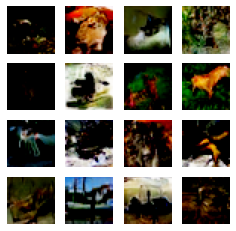

Time for training : 38301 sec


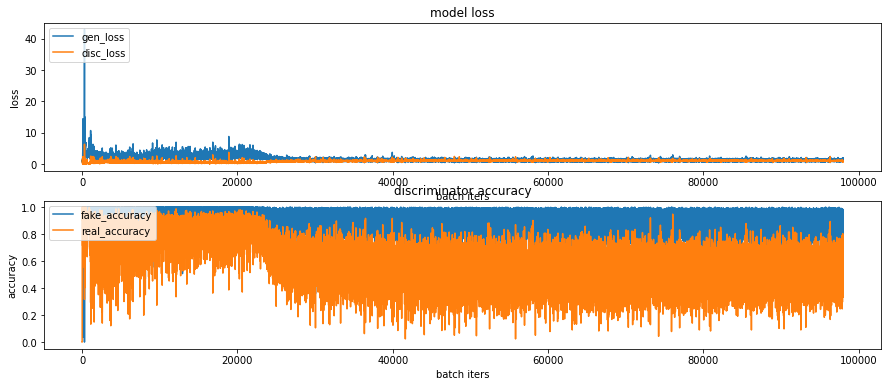

CPU times: user 10h 38min 5s, sys: 6min 21s, total: 10h 44min 27s
Wall time: 10h 38min 25s


In [31]:
%%time
train(train_dataset, EPOCHS, save_every)

# 학습과정의 loss, accuracy 그래프 이미지 파일이 ~/aiffel/dcgan_newimage/cifar10/training_history 경로에 생성되고 있으니
# 진행 과정을 수시로 확인해 보시길 권함

- 만약 생성자가 만든 Fake Image에 대한 판별자의 Accuracy(fake_accuracy)가 계속 1에 가깝게 유지되고 있다면, 생성자가 만든 이미지가 아직 판별자를 성공적으로 속이지 못하고 있다는 뜻
- 보다 나은 결과물 만들기 위해서는 더욱 많은 epoch으로 학습 시켜야 함
- 과연 생성 모델이 이전에는 없던 새로운 디자인의 패션을 만들어내는 것을 확인할 수 있음(물론 시간은 그와 비례하여 늘어남)
- 단순히 학습수행 시간 늘리는 것보다, 모델구조나 학습 방법을 바꾸어 봐야 할 수도 있음
- 그래프를 유심히 보면서 학습 결과가 더이상 개선되고 있지 않은지 여부를 지속적으로 살펴보기

### 학습과정 시각화하기
- 학습이 끝난 후, 생성했던 샘플 이미지들을 합쳐 GIF 파일, 일명 움짤로 만들어 봤음
- GIF 파일은 오래전에 import 해놓았던 'imageio' 라이브러리를 활용해 만들 수 있음
- 'imageio.get_writer'를 활용해서 파일을 열고, 거기에 'append_data'로 이미지를 하나씩 붙여나가는 방식
- 아래 코드가 무사히 실행되면, 'cifar10_dcgan.gif' 파일이 저장되어 있는 것을 확인할 수 있음

In [32]:
anim_file = os.getenv('HOME')+'/aiffel/AIFFEL_PROJECT/EXPLORATION_13/dcgan_newimage/cifar10/cifar10_dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/AIFFEL_PROJECT/EXPLORATION_13/dcgan_newimage/cifar10/generated_samples/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/AIFFEL_PROJECT/EXPLORATION_13/dcgan_newimage/cifar10/cifar10_dcgan.gif

-rw-r--r-- 1 root root 3310754 Sep  1 00:26 /aiffel/aiffel/AIFFEL_PROJECT/EXPLORATION_13/dcgan_newimage/cifar10/cifar10_dcgan.gif


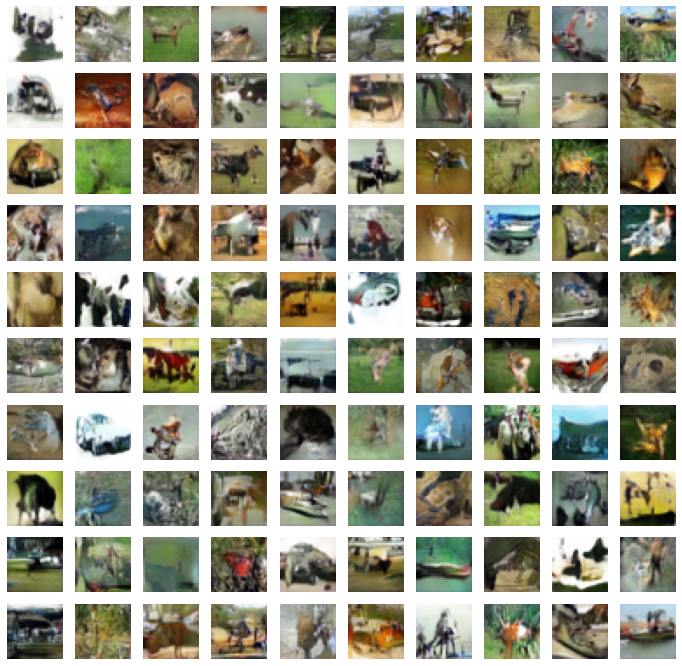

In [34]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/AIFFEL_PROJECT/EXPLORATION_13/dcgan_newimage/cifar10/training_checkpoints'

latest = tf.train.latest_checkpoint(checkpoint_dir)
checkpoint.restore(latest)

generator = checkpoint.generator
discriminator = checkpoint.discriminator

# 로드한 모델이 정상적으로 이미지를 생성하는지 확인해 봅니다.
plt.figure(figsize=(12, 12))

for i in range(100):
    plt.subplot(10, 10, i+1)
    noise = tf.random.normal([1, 100])
    generated_image = generator(noise, training=False)
    np_generated = generated_image.numpy()
    np_generated = (np_generated * 127.5) + 127.5   # reverse of normalization
    np_generated = np_generated.astype(int)
    plt.imshow(np_generated[0])
    plt.axis('off')
plt.show()  # 정상적으로 모델이 로드되었다면 랜덤 이미지가 아니라 CIFAR-10 이미지가 그려질 것입니다.

## 9. (Optional) GAN 훈련 과정 개선하기

- 8번을 진행하면서 생성된 샘플 이미지, 학습 과정 그래프 등을 통해 이전 훈련 과정의 문제점 분석
- 모델구조 또는 학습 과정을 개선한 내역과 그 결과(샘플 이미지, 학습 과정 그래프 포함)를 함께 제출
- (참고) 아래 언급된 페이지들에서개선을 위한 아이디어 얻을 수 있을 것
    - [How to Train a GAN? Tips and tricks to make GANs work](https://github.com/soumith/ganhacks)
    - [10 Lessons I Learned Training GANs for one Year](https://machinelearningmastery.com/how-to-train-stable-generative-adversarial-networks/)
    - [Tips for Training Stable Generatvie Adversarial Networks](https://machinelearningmastery.com/how-to-train-stable-generative-adversarial-networks/)
    - [Improved Techniques for Training GANs(paper](https://papers.nips.cc/paper/2016/file/8a3363abe792db2d8761d6403605aeb7-Paper.pdf)

### 개선한 내용
(1) Generator 모델 개선
- 모든 층에 Batch Noromalization 레이어 추가 및 Leaky ReLU의 하이퍼 파라미터를 0.2로 지정
- Fashion MNIST에서 사용한 모델보다 층을 더 깊게 쌓음
(2) Discriminator 모델 개선
- 모든 층에 Batch Noromalization 레이어 추가 및 Leaky ReLU의 하이퍼 파라미터를 0.2로 지정
- Fashion MNIST에서 사용한 모델보다 층을 더 깊게 쌓음